# Logistic Regression

## What is Logistic Regression?

- Logistic Regression is a supervised machine learning algorithm used to model the probability of a certain class or event. 
- It is usually used for Binary classification problems.
- Binary classification refers to predicting the output variable that is discrete in two classes, such as (Stroke/No Stroke) event occurring.

## How does Logistic Regression Work?

- The logistic regression model works similarly to the linear regression model. 
- The linear equation in the linear regression model is normally written as p = b0 + b1 * x, with p representing probability. 
- However, the values of the linear equation can exceed the range (0,1) of probability. Thus, we need to predict the logarithm of odds.

**Odds**: <br>
`The ratio of the probability of an event occurring to the probability of the event not occurring.`

- Updating the equation mentioned earlier, we end up with p/(1-p) = b0 + b1 * x. 
- Since odds can only be positive, we use logarithm of odds, which updates the equation further to ln(p/(1-p)) = b0+b1*x.

- Simplifying the equation further, we eventually end up with the equation p = 1 / (1 + e^-(b0+b1x)). 
- This represents a simplified equation for probability with only one predictor variable x.
- By plugging in different values of x, we can obtain the probability of it falling within a given class. 
- We can then snap the probability to a binary class value (e.g 0 if probability(predictor) < 0.5 and probability(predictor) >= 0.5) to help us make the prediction.

## Essential Libraries

Import essential Python Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### Import relevant modules from sklearn

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Import differently sampled training data

> Random Sampling: `train.csv`<br>
> SMOTE (SME): `SMOTEoversampling_train.csv`<br>
> SMOTEENN (SMN): `SMOTEENNoversampling_train.csv`<br>
> ADASYN (ADA): `ADASYNoversampling_train.csv`<br>

After importing, convert the data type to category for the relevant columns.

### 1. Random Sampling

In [3]:
#Importing randomly sampled data
train = pd.read_csv("data/train.csv", index_col=0).loc[:, 'gender':]

#Convert relevant columns into categorical
for col in ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
    train[col] = train[col].astype('category')

train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2504,0,44.0,0,0,0,4,1,127.21,29.8,2,0
3389,0,31.0,0,0,1,4,0,75.82,29.1,1,0
3444,0,41.0,0,0,1,4,1,103.79,28.6,1,0
2077,1,74.0,0,0,1,4,0,65.28,28.2,1,0
4761,0,76.0,1,0,1,5,1,78.68,23.3,1,0


### 2. SMOTE

In [4]:
#Importing SMOTE oversampled data
sme_train = pd.read_csv("data/SMOTEoversampling_train.csv", index_col=0).loc[:, 'gender':]

#Convert relevant columns into categorical
for col in ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
    sme_train[col] = sme_train[col].astype('category')

sme_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,44.0,0,0,0,4,1,127.21,29.8,2,0
1,0,31.0,0,0,1,4,0,75.82,29.1,1,0
2,0,41.0,0,0,1,4,1,103.79,28.6,1,0
3,1,74.0,0,0,1,4,0,65.28,28.2,1,0
4,0,76.0,1,0,1,5,1,78.68,23.3,1,0


<!-- ### SMOTE-Tomek -->

### 3. SMOTEENN

In [5]:
#Importing SMOTETEENN oversampled data
smn_train = pd.read_csv("data/SMOTEENNoversampling_train.csv", index_col=0).loc[:, 'gender':]

#Convert relevant columns into categorical
for col in ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
    smn_train[col] = smn_train[col].astype('category')

smn_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,44.0,0,0,0,4,1,127.21,29.8,2,0
1,0,31.0,0,0,1,4,0,75.82,29.1,1,0
2,0,41.0,0,0,1,4,1,103.79,28.6,1,0
3,1,74.0,0,0,1,4,0,65.28,28.2,1,0
4,0,76.0,1,0,1,5,1,78.68,23.3,1,0


### 4. ADASYN

In [6]:
#Importing ADASYN oversampled data
ada_train = pd.read_csv("data/ADASYNoversampling_train.csv", index_col=0).loc[:, 'gender':]

#Convert relevant columns into categorical
for col in ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
    ada_train[col] = ada_train[col].astype('category')

ada_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,44.0,0,0,0,4,1,127.21,29.8,2,0
1,0,31.0,0,0,1,4,0,75.82,29.1,1,0
2,0,41.0,0,0,1,4,1,103.79,28.6,1,0
3,1,74.0,0,0,1,4,0,65.28,28.2,1,0
4,0,76.0,1,0,1,5,1,78.68,23.3,1,0


## Test data

In [7]:
test = pd.read_csv("data/test.csv", index_col=0).loc[:, 'gender':]

#Convert relevant columns into categorical
for col in ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
    test[col] = test[col].astype('category')
    
test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1281,1,8.0,0,0,0,1,1,88.83,18.5,1,0
1033,1,34.0,0,0,0,4,1,108.47,30.4,2,0
4910,0,34.0,0,0,0,4,0,69.06,29.0,2,0
2335,1,48.0,0,0,1,4,0,106.74,33.7,0,0
607,0,1.8,0,0,0,1,1,102.34,17.0,1,0


In [8]:
y_test = test['stroke']
x_test = test.drop(['stroke'], axis = 1) # Remove the response variable

# Evaluative Metrics for Classification of Train by Logistic Regression

To evaluate the performance of our logistic regression model, we will consider five metrics:
1. **Accuracy** (The number of classifications a model correctly predicts divided by the total number of predictions made.)
2. **Precision** (The ability of a classification model to identify only the relevant data points.)
3. **Sensitivity** (Evaluates a model's ability to predict true positives of stroke.)
4. **Specificity** (Evaluates a model's ability to predict true negatives of stroke, equivalent to no stroke.)
5. **F1-score** (Overall measure that combines precision and recall, where a good F1-score means that you are correctly identifying the relevant class and are not influenced by false alarms.)

In [9]:
# Creating a function to print the 5 performance metrics we are using to evaluate the performance 
def metrics(x, y, y_pred, name, title, table):
    
    #List containing the performance evaluation measures
    evlist = []
    
    #Label Train or Test
    if name == 'train':
        print("Train Data")
    else:
        print("Test Data")
        
    # Print the Accuracy Measures from the Confusion Matrix
    CM = confusion_matrix(y, y_pred)
    TP = CM[1][1] # True Positives : Y (1) predicted Y (1)
    FP = CM[0][1] # False Positives : N (0) predicted Y (1)
    TN = CM[0][0] # True Negatives : N (0) predicted N (0)
    FN = CM[1][0] # False Negatives : Y (1) predicted N (0)

    accuracy = (TP+TN)/(TP+TN+FP+FN)
    
    if (TP+FP) == 0:
        precision = 0.0
    else:
        precision = TP/(TP+FP)
        
    if(TP+FN) == 0:
        sensitivity = 0.0
    else:
        sensitivity = TP/(TP+FN)
        
    if(TN+FP) == 0:
        specificity = 0.0
    else:
        specificity = TN/(TN+FP)
        
    if(precision + sensitivity) == 0:
        f1_score = 0
    else:
        f1_score = 2*(precision*sensitivity)/(precision+sensitivity)        
    
    
    #Print Performance Evaluation Measures
    print("Accuracy  :\t", accuracy)
    print()    
    
    print("Precision :\t", precision)
    print("Sensitivity :\t", sensitivity)
    print("Specificity :\t", specificity)
    print("F1-score :\t", f1_score)
    
    #Store data into list
    evlist.append(accuracy)
    evlist.append(precision)
    evlist.append(sensitivity)
    evlist.append(specificity)
    evlist.append(f1_score)    
    evlist = pd.DataFrame(evlist)
    
    #Concatenate data as column
    table = pd.concat([table, evlist], axis = 1)
    
    return table

# Function to plot two-way confusion matrix
def cMatrix(y, y_pred, title):
    sb.heatmap(confusion_matrix(y, y_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)

In [10]:
#Creates empty dataframe for future storage of performance evaluation measures
train_table = pd.DataFrame()
test_table = pd.DataFrame()

### 1. Random Sampling Dataset

In [11]:
#Assign x and y values
y_train = train['stroke']
x_train = train.drop(['stroke'], axis = 1) # Remove the response variable

label = pd.DataFrame(y_train.value_counts())
label.rename(columns = {'stroke': 'Occurrences'},index={1: "Stroke", 0: "No Stroke"})

,Occurrences
No Stroke,3900
Stroke,187


In [12]:
#Calculate probability of stroke
print("The probability of having a stroke in train dataset is\t:", y_train.value_counts()[1]/y_train.count())

#Perform the logistics regression
logreg1 = LogisticRegression(max_iter = 1000)
 
#Fit the data
logreg1.fit(x_train,y_train)

The probability of having a stroke in train dataset is	: 0.04575483239540005


LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.9544898458527037

Precision :	 0.6666666666666666
Sensitivity :	 0.0106951871657754
Specificity :	 0.9997435897435898
F1-score :	 0.021052631578947368


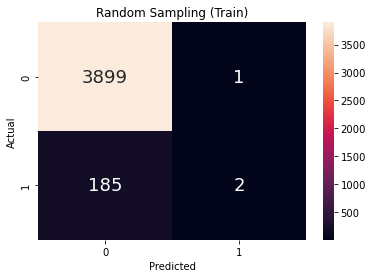

In [13]:
#Predict the train data
y_train_pred = logreg1.predict(x_train)

#Visualise the train data
train_table = metrics(x_train, y_train, y_train_pred, 'train', 'Random Sampling (Train)',train_table)
cMatrix(y_train, y_train_pred, 'Random Sampling (Train)')

Test Data
Accuracy  :	 0.9393346379647749

Precision :	 0.0
Sensitivity :	 0.0
Specificity :	 1.0
F1-score :	 0


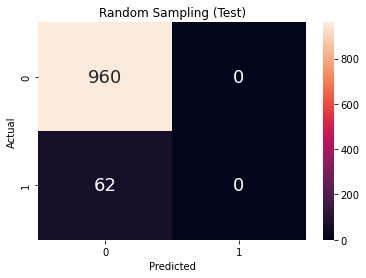

In [14]:
#Predict the test data
y_test_pred = logreg1.predict(x_test)

#Visualise the test data
test_table = metrics(x_test, y_test, y_test_pred, 'test', 'Random Sampling (Test)',test_table)
cMatrix(y_test, y_test_pred, 'Random Sampling (Test)')

### 2. SMOTE Dataset

In [15]:
#Assign x and y values
y_train = sme_train['stroke']
x_train = sme_train.drop(['stroke'], axis = 1) # Remove the response variable

label = pd.DataFrame(y_train.value_counts())
label.rename(columns = {'stroke': 'Occurrences'},index={1: "Stroke", 0: "No Stroke"})

,Occurrences
No Stroke,3900
Stroke,3900


In [16]:
#Calculate probability of stroke
print("The probability of having a stroke in train dataset is\t:", y_train.value_counts()[1]/y_train.count())

#Perform the logistics regression
logreg2 = LogisticRegression(max_iter = 1000)
 
#Fit the data
logreg2.fit(x_train,y_train)

The probability of having a stroke in train dataset is	: 0.5


LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.8361538461538461

Precision :	 0.8254716981132075
Sensitivity :	 0.8525641025641025
Specificity :	 0.8197435897435897
F1-score :	 0.8387991927346115


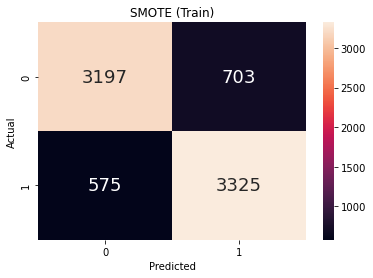

In [17]:
#Predict the train data
y_train_pred = logreg2.predict(x_train)

#Visualise the train data
train_table = metrics(x_train, y_train, y_train_pred, 'train', 'SMOTE (Train)', train_table)
cMatrix(y_train, y_train_pred, 'SMOTE (Train)')

Test Data
Accuracy  :	 0.7847358121330724

Precision :	 0.14732142857142858
Sensitivity :	 0.532258064516129
Specificity :	 0.8010416666666667
F1-score :	 0.23076923076923075


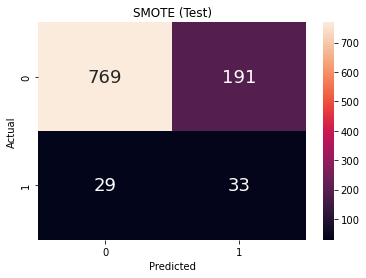

In [18]:
#Predict the test data
y_test_pred = logreg2.predict(x_test)

#Visualise the test data
test_table = metrics(x_test, y_test, y_test_pred, 'test', 'SMOTE (Test)', test_table)
cMatrix(y_test, y_test_pred, 'SMOTE (Test)')

<!-- ### Classification of SMOTE-Tomek -->

### 3. SMOTEENN Dataset

In [19]:
#Assign x and y values
y_train = smn_train['stroke']
x_train = smn_train.drop(['stroke'], axis = 1) # Remove the response variable

label = pd.DataFrame(y_train.value_counts())
label.rename(index={1: "Stroke", 0: "No Stroke"})

,stroke
Stroke,3900
No Stroke,3892


In [20]:
#Calculate probability of stroke
print("The probability of having a stroke in train dataset is\t: ", y_train.value_counts()[1]/y_train.count())

#Perform the logistics regression
logreg3 = LogisticRegression(max_iter = 1000)
 
#Fit the data
logreg3.fit(x_train,y_train)

The probability of having a stroke in train dataset is	:  0.49948665297741274


LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.8364989733059548

Precision :	 0.8258064516129032
Sensitivity :	 0.8533333333333334
Specificity :	 0.8196300102774923
F1-score :	 0.839344262295082


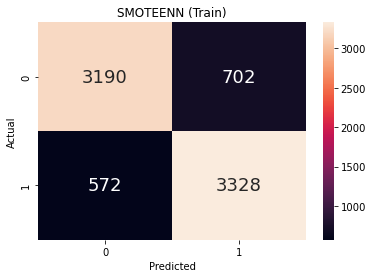

In [21]:
#Predict the train data
y_train_pred = logreg3.predict(x_train)

#Visualise the train data
train_table = metrics(x_train, y_train, y_train_pred, 'train', 'SMOTEENN (Train)', train_table)
cMatrix(y_train, y_train_pred, 'SMOTEENN (Train)')

Test Data
Accuracy  :	 0.7847358121330724

Precision :	 0.14732142857142858
Sensitivity :	 0.532258064516129
Specificity :	 0.8010416666666667
F1-score :	 0.23076923076923075


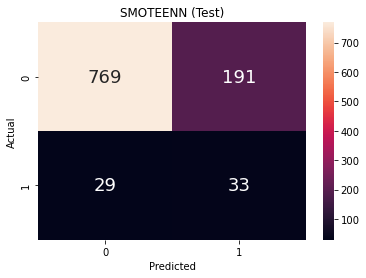

In [22]:
#Predict the test data
y_test_pred = logreg3.predict(x_test)

#Visualise the test data
test_table = metrics(x_test, y_test, y_test_pred, 'test', 'SMOTEENN (Test)', test_table)
cMatrix(y_test, y_test_pred, 'SMOTEENN (Test)')

### 4. ADASYN Dataset

In [23]:
#Assign x and y values
y_train = ada_train['stroke']
x_train = ada_train.drop(['stroke'], axis = 1) # Remove the response variable

label = pd.DataFrame(y_train.value_counts())
label.rename(columns = {'stroke': 'Occurrences'},index={1: "Stroke", 0: "No Stroke"})

,Occurrences
Stroke,3902
No Stroke,3900


In [24]:
#Calculate probability of stroke
print("The probability of having a stroke in train dataset is\t: ", y_train.value_counts()[1]/y_train.count())

#Perform the logistics regression
logreg4 = LogisticRegression(max_iter = 1000)
 
#Fit the data
logreg4.fit(x_train,y_train)

#Print out the classification accuracy
print("The overall classification accuracy \t\t: ", logreg4.score(x_test,y_test))

The probability of having a stroke in train dataset is	:  0.4998718277364778
The overall classification accuracy 		:  0.7915851272015656


Train Data
Accuracy  :	 0.8555498590105102

Precision :	 0.831858407079646
Sensitivity :	 0.8913377754997437
Specificity :	 0.8197435897435897
F1-score :	 0.860571569961648


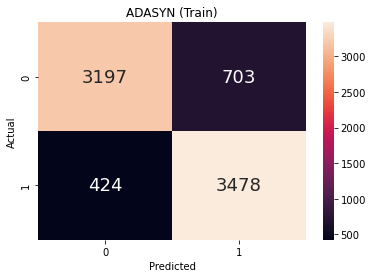

In [25]:
#Predict the train data
y_train_pred = logreg4.predict(x_train)

#Visualise the train data
train_table = metrics(x_train, y_train, y_train_pred, 'train', 'ADASYN (Train)', train_table)
cMatrix(y_train, y_train_pred, 'ADASYN (Train)')

Test Data
Accuracy  :	 0.7915851272015656

Precision :	 0.1552511415525114
Sensitivity :	 0.5483870967741935
Specificity :	 0.8072916666666666
F1-score :	 0.24199288256227758


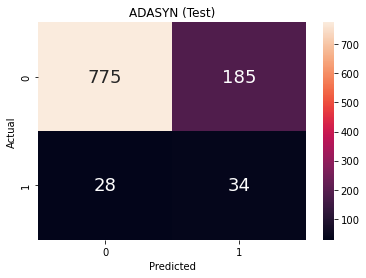

In [26]:
#Predict the test data
y_test_pred = logreg4.predict(x_test)

#Visualise the test data
test_table = metrics(x_test, y_test, y_test_pred, 'test', 'ADASYN (Test)', test_table)
cMatrix(y_test, y_test_pred, 'ADASYN (Test)')

# Comparison of the Metrics

## Function for Graph Creation

In [27]:
def graphing(table, row, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.ylim([0,1.1])
    plot = sb.barplot(x = ['Random Sampling', 'SMOTE', 'SMOTEENN', 'ADASYN'], y = table.iloc[row,:])
    for x in plot.patches:
        if x.get_height() == 0:
            plot.annotate(format(x.get_height(), '.3f'), 
                           (x.get_x() + x.get_width() / 2., x.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           fontsize = 14, 
                           textcoords = 'offset points')
        else:
            plot.annotate(format(x.get_height(), '.3f'), 
                           (x.get_x() + x.get_width() / 2., x.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           fontsize = 14, 
                           textcoords = 'offset points')

## Visualising train data

### Setting the Axis and returning the Table of the stored metrics for Train

In [28]:
train_table = train_table.set_axis(['Random Sampling', 'SMOTE', 'SMOTEENN', 'ADASYN'], axis = 1)
train_table = train_table.set_axis(['Accuracy','Precision', 'Sensitivity', 'Specificity', 'F1-Score'], axis = 0)
train_table

,Random Sampling,SMOTE,SMOTEENN,ADASYN
Accuracy,0.954490,0.836154,0.836499,0.855550
Precision,0.666667,0.825472,0.825806,0.831858
Sensitivity,0.010695,0.852564,0.853333,0.891338
Specificity,0.999744,0.819744,0.819630,0.819744
F1-Score,0.021053,0.838799,0.839344,0.860572


### Accuracy across the datasets (Train)

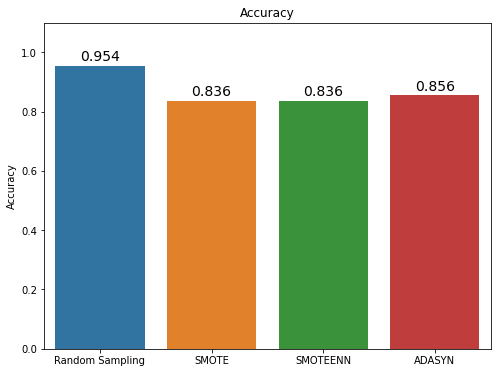

In [29]:
graphing(train_table, 0, "Accuracy")

### Precision across the datasets (Train)

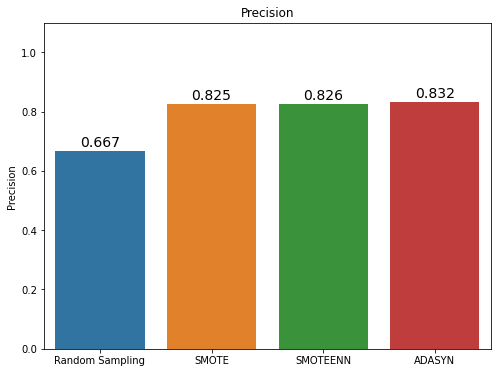

In [30]:
graphing(train_table, 1, "Precision")

### Sensitivity across the datasets (Train)

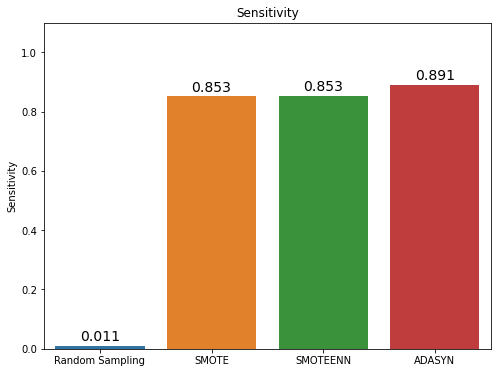

In [31]:
graphing(train_table, 2, "Sensitivity")

### Specificity across the datasets (Train)

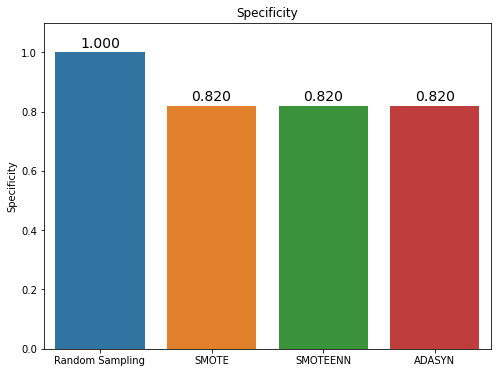

In [32]:
graphing(train_table, 3, "Specificity")

### F1-Score across the datasets (Train)

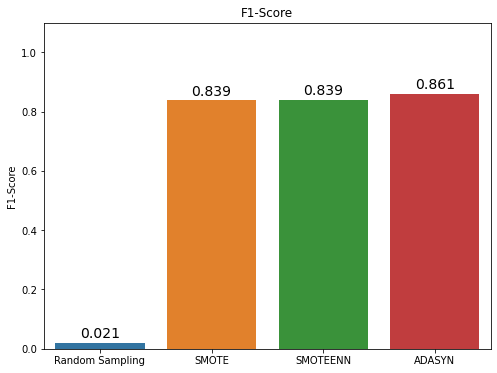

In [33]:
graphing(train_table, 4, "F1-Score")

### Setting the Axis and returning the Table of the stored metrics for Test

In [34]:
test_table = test_table.set_axis(['Random Sampling', 'SMOTE', 'SMOTEENN', 'ADASYN'], axis = 1)
test_table = test_table.set_axis(['Accuracy','Precision', 'Sensitivity', 'Specificity', 'F1-Score'], axis = 0)
test_table

,Random Sampling,SMOTE,SMOTEENN,ADASYN
Accuracy,0.939335,0.784736,0.784736,0.791585
Precision,0.000000,0.147321,0.147321,0.155251
Sensitivity,0.000000,0.532258,0.532258,0.548387
Specificity,1.000000,0.801042,0.801042,0.807292
F1-Score,0.000000,0.230769,0.230769,0.241993


### Accuracy across the datasets (Test)

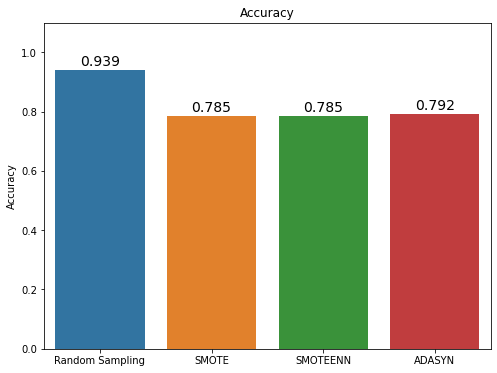

In [35]:
graphing(test_table, 0, "Accuracy")

### Precision across the datasets (Test)

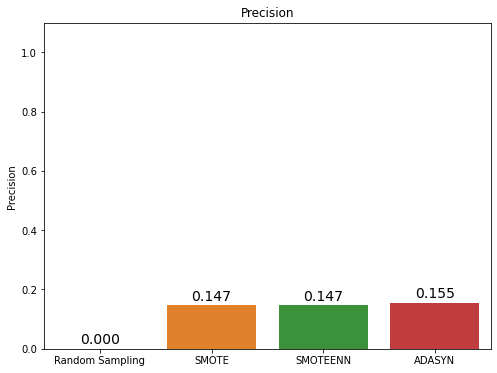

In [36]:
graphing(test_table, 1, "Precision")

### Sensitivity across the datasets (Test)

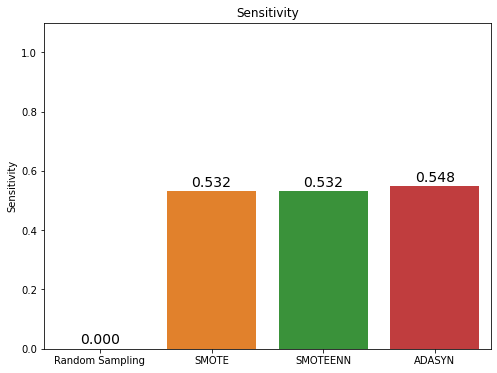

In [37]:
graphing(test_table, 2, "Sensitivity")

### Specificity across the datasets (Test)

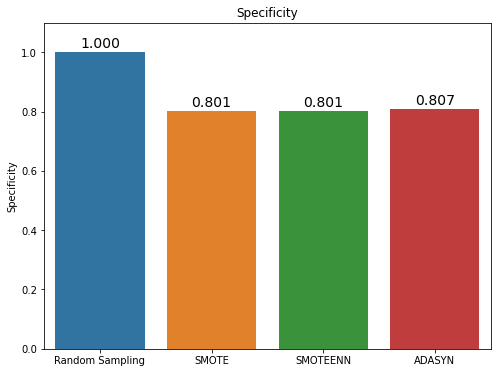

In [38]:
graphing(test_table, 3, "Specificity")

### F1-Score across the datasets (Test)

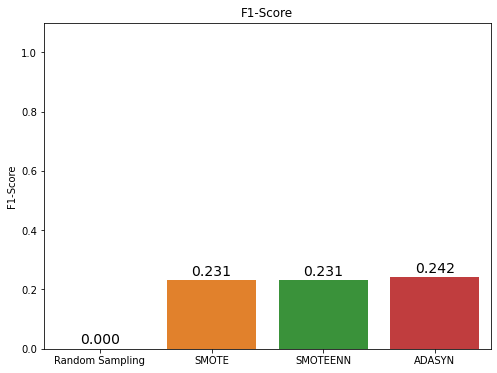

In [39]:
graphing(test_table, 4, "F1-Score")

# Analysis of Results (Test)

In [40]:
test_table = test_table.set_axis(['Random Sampling', 'SMOTE', 'SMOTEENN', 'ADASYN'], axis = 1)
test_table = test_table.set_axis(['Accuracy','Precision', 'Sensitivity', 'Specificity', 'F1-Score'], axis = 0)
test_table

,Random Sampling,SMOTE,SMOTEENN,ADASYN
Accuracy,0.939335,0.784736,0.784736,0.791585
Precision,0.000000,0.147321,0.147321,0.155251
Sensitivity,0.000000,0.532258,0.532258,0.548387
Specificity,1.000000,0.801042,0.801042,0.807292
F1-Score,0.000000,0.230769,0.230769,0.241993


## Guide

- **TP:** People correctly predicted to have a stroke
- **FP:** People wrongly predicted to have a stroke
- **TN:** People correctly predicted not to have a stroke
- **FN:** People wrongly predicted not to have a stroke

## Accuracy

In [41]:
test_table.iloc[0].sort_values(ascending = False)

Random Sampling    0.939335
ADASYN             0.791585
SMOTE              0.784736
SMOTEENN           0.784736
Name: Accuracy, dtype: float64

**Formula:** <br>
`(TP + TN) / (TP + FP + FN + TP)`

**Results:**
- The `Randomly Sampled` data ranked the highest, followed by `ADASYN`, `SMOTE` and `SMOTEENN`.

**Explanation:**
- A higher ratio indicates that the method of sampling results in a more accurate model that yields a higher fraction of correct predictions.
- However, this may be misleading.
- A model may be trained on an imbalanced dataset with many negatieve values, and may still achieve a high accuracy value, due to the large proportion of actual negative values (TN) in the test data.
- This explains why the model generated from random sampling has achieved high accuracy.
- Hence, other metrics should also be considered.

## Precision

In [42]:
test_table.iloc[1].sort_values(ascending = False)

ADASYN             0.155251
SMOTE              0.147321
SMOTEENN           0.147321
Random Sampling    0.000000
Name: Precision, dtype: float64

**Formula:**
`TP/(TP + FP)`

**Results**
- `ADASYN` had the highest value, followed by `SMOTE` and `SMOTEENN`, and finally `Random Sampling`.

**Explanation:**
- Precision measures the proportion of people predicted to have a stroke, that would actually get a stroke
- There should be an increased focus on Precision if wer want to minimise False Positives (People wrongly predicted to have stroke)

## Sensitivity

In [43]:
test_table.iloc[2].sort_values(ascending = False)

ADASYN             0.548387
SMOTE              0.532258
SMOTEENN           0.532258
Random Sampling    0.000000
Name: Sensitivity, dtype: float64

**Formula:** <br>
`TP/(TP + FN)`

**Results:**
- `SMOTE`, `SMOTEENN`, `ADASYN` fared similarly. However, the `randomly sampling` dataset had a Sensitivity of 0.

**Explanation:**
- Also known as recall
- Measures the fraction of people correctly predicted to get a stroke, out of all people that would get a stroke.
- A higher value indicates a lower amount of False Negatives, while a lower value indicates a higher amount of False Negatives (proportion of people who were going to get a stroke that were not predicted)
- Given the detrimental effects of stroke on one's lifestyle, this metric should be seriously considered to avoid cases where people who would suffer from a stroke are incorrectly predicted.

## Specificity

In [44]:
test_table.iloc[3].sort_values(ascending = False)

Random Sampling    1.000000
ADASYN             0.807292
SMOTE              0.801042
SMOTEENN           0.801042
Name: Specificity, dtype: float64

**Formula:** <br>
`TN/(TN + TP)`

**Results:**
- `Randomly Sampling` data had the highest value, followed by `ADASYN`, then `SMOTE` and `SMOTEEN`.

**Explanation:**
- Also known as True Negative Rate
- Exact opposite of recall
- Tells us what proportion of people that were correctly predicted to NOT suffer a stroke in the future.
- Randomly Sampled data likely had high values due to its similarly imbalanced proportion with the test data, favouring no stroke.

## F1 Score

In [45]:
test_table.iloc[4].sort_values(ascending = False)

ADASYN             0.241993
SMOTE              0.230769
SMOTEENN           0.230769
Random Sampling    0.000000
Name: F1-Score, dtype: float64

**Formula:** <br>
`2* (Precision*Recall)/(Precision + Recall)`

**Results**
- `ADASYN` had the highest value, followed by `SMOTE` and `SMOTEENN`, and finally `Random Sampling`.

**Explanation:**
- Considers and represents both precision and recall
- Good F1 score means that we have low False Positives and low False Negatives.

## Conclusion

Among the sampling methods used, ADASYN has the highest value for Sensitivity, Precision and F1-Score, and the second highest for Accuracy and Specificity. Thus, we conclude from our results that ADASYN is the most effective sampling method among those used in training a reliable Logistic Regression Model.

### References
https://machinelearningmastery.com/logistic-regression-for-machine-learning/
https://www.analyticsvidhya.com/blog/2020/11/popular-classification-models-for-machine-learning/
https://www.analyticsvidhya.com/blog/2021/07/an-introduction-to-logistic-regression/
https://www.analyticsvidhya.com/blog/2020/12/decluttering-the-performance-measures-of-classification-models/
https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/
https://www.analyticsvidhya.com/blog/2020/10/how-to-choose-evaluation-metrics-for-classification-model/
https://wiki.pathmind.com/accuracy-precision-recall-f1#:~:text=That%20is%2C%20a%20good%20F1,total%20failure%20when%20it's%200%20.
https://neptune.ai/blog/evaluation-metrics-binary-classification
https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b